## EDA

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from taxipred.utils.constants import DATA_PATH

df = pd.read_csv("../data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [151]:
round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.07,19.91,1.23,12.63,25.83,38.40,146.07
Passenger_Count,950.0,2.48,1.10,1.00,1.25,2.00,3.00,4.00
Base_Fare,950.0,3.50,0.87,2.01,2.73,3.52,4.26,5.00
Per_Km_Rate,950.0,1.23,0.43,0.50,0.86,1.22,1.61,2.00
Per_Minute_Rate,950.0,0.29,0.12,0.10,0.19,0.29,0.39,0.50
Trip_Duration_Minutes,950.0,62.12,32.15,5.01,35.88,61.86,89.06,119.84
Trip_Price,951.0,56.87,40.47,6.13,33.74,50.07,69.10,332.04


Categorical columns

In [152]:
cat_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]

for col in cat_cols:
    print(f"\n{df[col].value_counts(dropna=False)}")


Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
NaN           50
Name: count, dtype: int64

Day_of_Week
Weekday    655
Weekend    295
NaN         50
Name: count, dtype: int64

Traffic_Conditions
Low       397
Medium    371
High      182
NaN        50
Name: count, dtype: int64

Weather
Clear    667
Rain     227
Snow      56
NaN       50
Name: count, dtype: int64


In [216]:
df[cat_cols] = df[cat_cols].fillna("Unknown")

df[cat_cols].isna().sum()

Time_of_Day           0
Day_of_Week           0
Traffic_Conditions    0
Weather               0
dtype: int64

## Plotting

<Axes: xlabel='Trip_Price', ylabel='Count'>

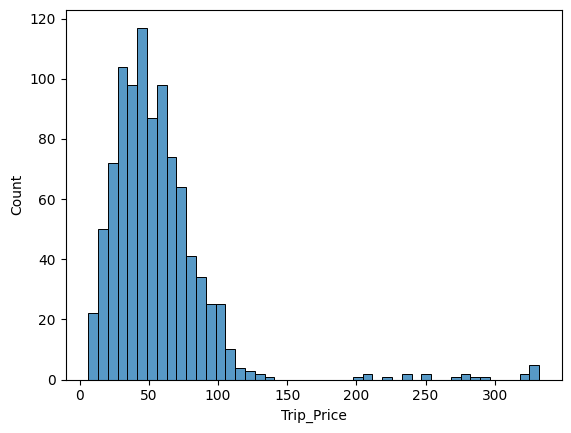

In [153]:
sns.histplot(df["Trip_Price"])

Trip Distance

Text(0.5, 1.0, 'Price vs Distance')

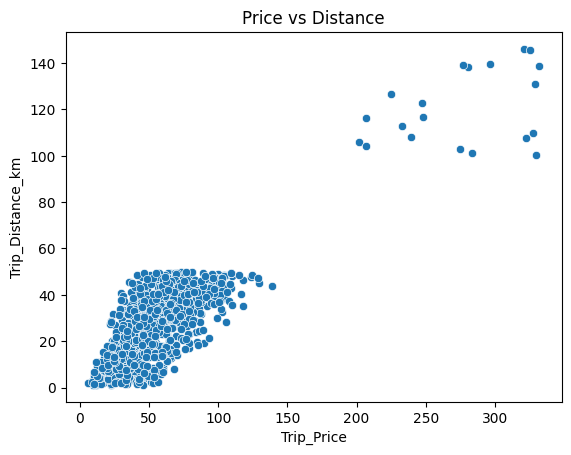

In [160]:
sns.scatterplot(data=df, x="Trip_Price", y="Trip_Distance_km")
plt.title("Price vs Distance")

<Axes: xlabel='Traffic_Conditions', ylabel='Trip_Price'>

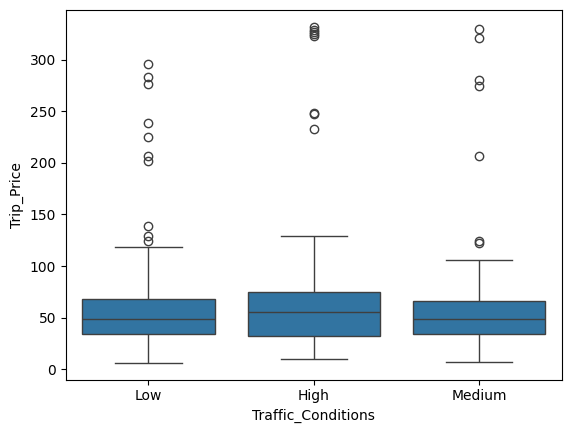

In [155]:
sns.boxplot(
    x="Traffic_Conditions",
    y="Trip_Price",
    data=df,
)

<Axes: xlabel='Time_of_Day', ylabel='Trip_Distance_km'>

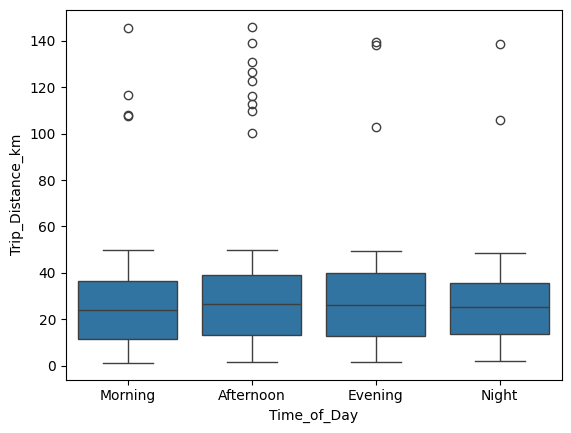

In [156]:
sns.boxplot(
    x="Time_of_Day",
    y="Trip_Distance_km",
    data=df,
)

<Axes: xlabel='Trip_Price', ylabel='Trip_Duration_Minutes'>

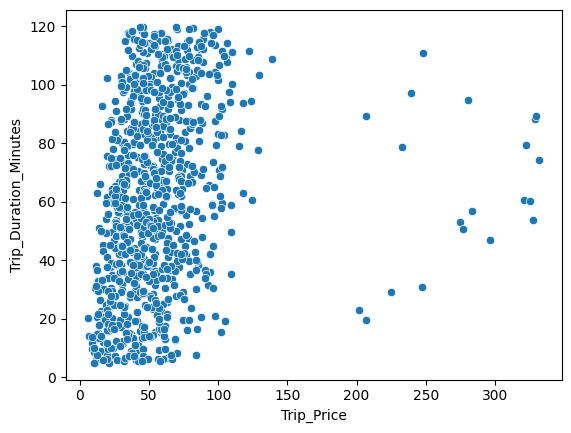

In [157]:
sns.scatterplot(
    data=df, 
    x="Trip_Price", 
    y="Trip_Duration_Minutes"
)

<Axes: xlabel='Traffic_Conditions', ylabel='Trip_Price'>

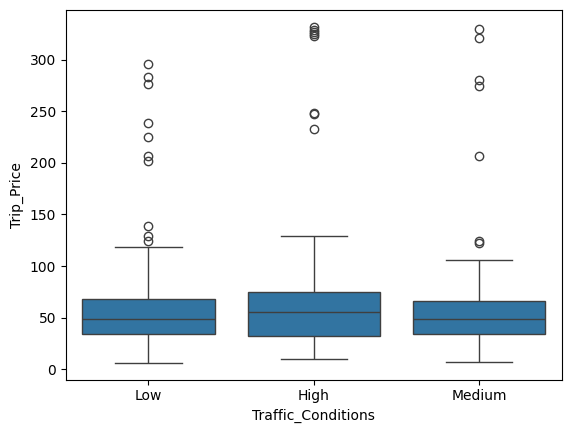

In [158]:
sns.boxplot(data=df, x="Traffic_Conditions", y="Trip_Price")

Correlation heat map

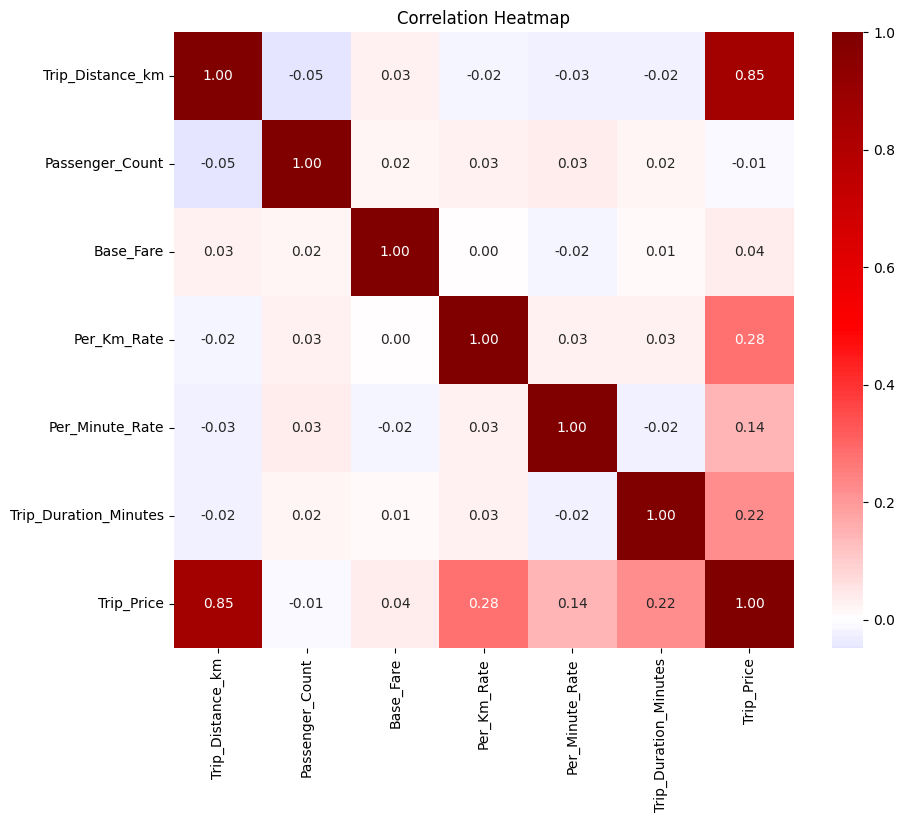

In [228]:
num_df = df.select_dtypes(include="number")
corr = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".2f",
    cmap="seismic",
    center=0
)
plt.title("Correlation Heatmap")
plt.show()

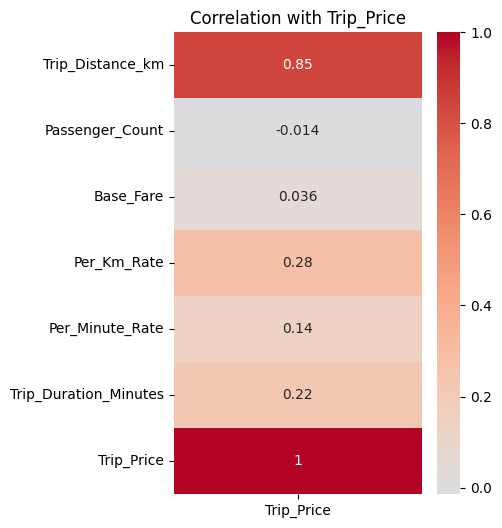

In [224]:
plt.figure(figsize=(4, 6))
sns.heatmap(
    corr[["Trip_Price"]],
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation with Trip_Price")
plt.show()
